<a href="https://colab.research.google.com/github/zahrababacar6c/Prediction-du-Diabete/blob/main/PredictionDiabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Des Librairies et chargement du dataset**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [3]:
#chargement du dataset dans un dataframe
path="/content/diabetes.csv"
df = pd.read_csv(path)

In [4]:
#affichage des donnees
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

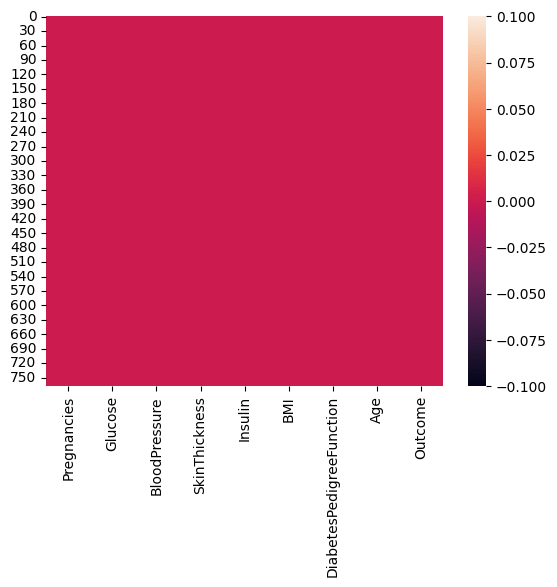

In [7]:
#Recherche les valeurs nulls
sns.heatmap(df.isnull())

In [12]:
#Matrice de Correlation
corr_matrix = df.corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

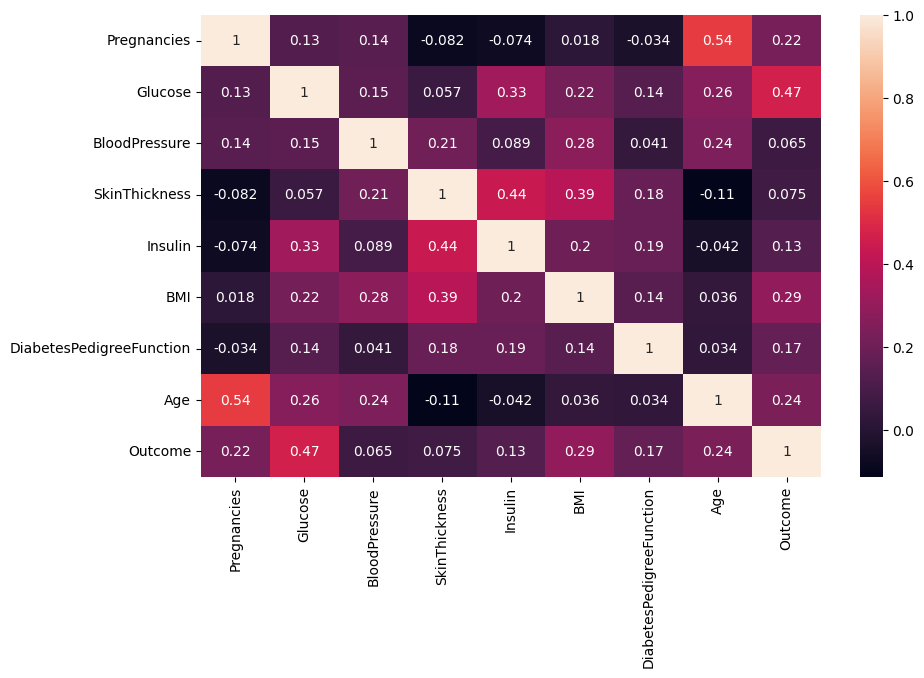

In [17]:
#Visualisation de la Correlation entre les variables
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
#Division du jeu de donnees en variable dependants et independants
X  = df.iloc[:,:-1]
y =df['Outcome']

In [33]:
#Standardisation des donnees
sc =StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [34]:
#factionnement du dataset en donnees d'entrainement(80%) et de test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
print(X_train.shape)
print(X_test.shape)


(614, 8)
(154, 8)


In [36]:
# Train an XGBoost classifier model

import xgboost as xgb
XGB_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
result_train = XGB_model.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.8583061889250815


In [49]:
# predict the score of the trained model using the testing dataset

result_test = XGB_model.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.7662337662337663


In [50]:
# make predictions on the test data
y_pred = XGB_model.predict(X_test)



In [51]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       102
           1       0.75      0.46      0.57        52

    accuracy                           0.77       154
   macro avg       0.76      0.69      0.71       154
weighted avg       0.76      0.77      0.75       154



Text(0.5, 23.52222222222222, 'Actual class')

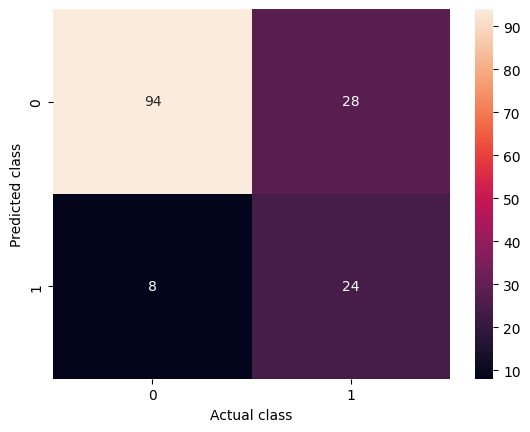

In [52]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')

In [46]:
#Entrainemnt du Modele Regresion logistique
modele_Rlog = LogisticRegression()
modele_Rlog.fit(X_train, y_train)

LogisticRegression()

In [47]:
#Prediction
y_predict = modele_Rlog.predict(X_test)
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [48]:
#Evaluation du modele
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.7987012987012987

In [54]:
result_test = modele_Rlog.score(X_test,y_test)
print("Accuracy:{}".format(result_test))

Accuracy:0.7987012987012987


In [56]:
y_predict = modele_Rlog.predict(X_test)

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       102
           1       0.74      0.62      0.67        52

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



Text(0.5, 23.52222222222222, 'actual class')

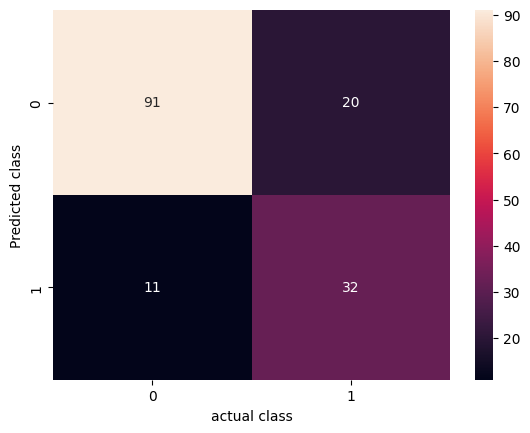

In [58]:
cm=confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True)
plt.ylabel("Predicted class")
plt.xlabel("actual class")